# Support Vector Machines Implementation :

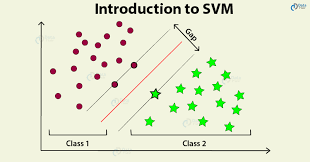

## Necessary imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cell_data = pd.read_csv(r"C:\Users\hp\Downloads\cell_samples.csv")

In [7]:
cell_data.head()
cell_data.tail()
cell_data.shape
cell_data.size

7689

In [9]:
cell_data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [13]:
cell_data.describe


<bound method NDFrame.describe of           ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0    1000025      5         1          1        1            2       1   
1    1002945      5         4          4        5            7      10   
2    1015425      3         1          1        1            2       2   
3    1016277      6         8          8        1            3       4   
4    1017023      4         1          1        3            2       1   
..       ...    ...       ...        ...      ...          ...     ...   
694   776715      3         1          1        1            3       2   
695   841769      2         1          1        1            2       1   
696   888820      5        10         10        3            7       3   
697   897471      4         8          6        4            3       4   
698   897471      4         8          8        5            4       5   

     BlandChrom  NormNucl  Mit  Class  
0             3         1    1      2

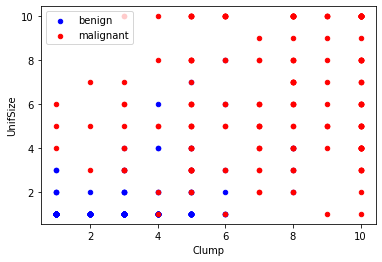

In [31]:
benign_df = cell_data[cell_data['Class']==2][0:200]
malignant_df = cell_data[cell_data['Class']==4][0:200]

axes = benign_df.plot(kind = 'scatter', x='Clump',y='UnifSize', color= 'blue', label = 'benign')

malignant_df.plot(kind = 'scatter', x='Clump',y='UnifSize', color= 'red', label = 'malignant',ax=axes)

Then we have to check that all the ccolumns whether thay have value or they are in string and then we will convert that one in integer format so that there will be ab ease to work upon on ckassification.

In [38]:
cell_data.dtypes

cell_data = cell_data[pd.to_numeric(cell_data['BareNuc'],errors = 'coerce').notnull()]
cell_data['BareNuc'] = cell_data['BareNuc'].astype('int')
cell_data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

Here we have separated the dependent variables in X and independent varivale in Y that is class

In [50]:
cell_data.columns

features_df = cell_data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

X= np.asarray(features_df)

y= np.asarray(cell_data['Class'])

X[0:6]
y[0:5]



array([2, 2, 2, 2, 2], dtype=int64)

## Divide the data into trainset and test set

In [52]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train , y_test = train_test_split(X,y , test_size = 0.2, random_state=4)

X_train.shape
X_test.shape
y_train.shape
y_test.shape

(137,)

## Modelling SVM with scikit-learn

###  SVM Kernel Functions
SVM algorithms use a set of mathematical functions that are defined as the kernel. The function of kernel is to take data as input and transform it into the required form. Different SVM algorithms use different types of kernel functions. These functions can be different types. For example linear, nonlinear, polynomial, radial basis function (RBF), and sigmoid.

In [57]:
from sklearn import svm

classifier = svm.SVC(kernel = 'linear',gamma='auto',C=2)
classifier.fit(X_train , y_train)

y_predict = classifier.predict(X_test)

## Evaluation 

## Confusion Matrix :

Classification is a process of categorizing a given set of data into classes.
In Machine Learning(ML), you frame the problem, collect and clean the data, add some necessary feature variables(if any), train the model, measure its performance, improve it by using some cost function, and then it is ready to deploy. 

Each row in a confusion matrix represents an actual class, while each column represents a predicted class.

Precision
precision = (TP) / (TP+FP)
TP is the number of true positives, and FP is the number of false positives. 
A trivial way to have perfect precision is to make one single positive prediction and ensure it is correct (precision = 1/1 = 100%). This would not be very useful since the classifier would ignore all but one positive instance. 
 

Recall
recall = (TP) / (TP+FN)


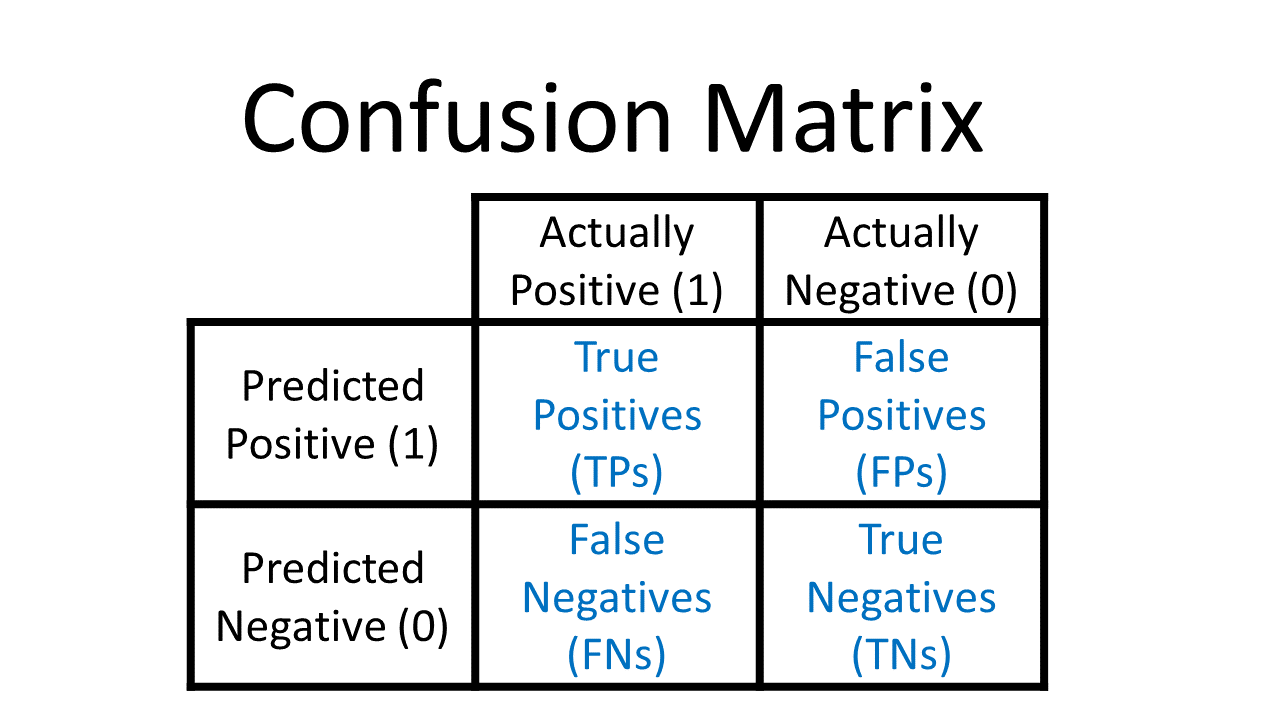

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

